# Import Statement

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Data Cleaning

In [2]:
orders_df = pd.read_csv('food_orders_new_delhi.csv')
orders_df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


In [3]:
orders_df.fillna({'Discounts and Offers': 0}, inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [4]:
orders_df.duplicated().value_counts()

,count
False,1000


In [5]:
orders_df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [6]:
orders_df['Delivery Date and Time'] = pd.to_datetime(orders_df['Delivery Date and Time'])
orders_df['Order Date and Time'] = pd.to_datetime(orders_df['Order Date and Time'])

In [7]:
def extract_discount_value(discount_str):
    if pd.isna(discount_str):
        return 0
    discount_str = str(discount_str)
    match = re.search(r'\d+\.?\d*', discount_str)
    return float(match.group()) if match else 0


def calculate_discount(order_value, discount_str):
    discount_value = extract_discount_value(discount_str)
    if '%' in str(discount_str):
        return (discount_value / 100) * order_value
    return discount_value

orders_df['Discount Amount'] = orders_df.apply(
    lambda row: calculate_discount(row['Order Value'], row['Discounts and Offers']),
    axis=1
)
orders_df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0,146,27,0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,41.25
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0,110,42,0,0.00
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,0,64,31,0,0.00
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,212.10


In [8]:
orders_df_cleaned = orders_df.drop(columns=['Discounts and Offers'])
orders_df_cleaned

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,150,47,0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,198,23,0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,195,45,0,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,146,27,0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,130,50,0,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,165,47,50,41.25
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,110,42,0,0.00
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,64,31,0,0.00
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,199,34,0,212.10


In [9]:
orders_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Commission Fee          1000 non-null   int64         
 9   Payment Processing Fee  1000 non-null   int64         
 10  Refunds/Chargebacks     1000 non-null   int64         
 11  Discount Amount         1000 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(6), objec

# Exploratory Data Analysis



### Feature Engineering

In [11]:
orders_df_cleaned['Delivery Time (minutes)'] = (orders_df_cleaned['Delivery Date and Time'] - orders_df_cleaned['Order Date and Time']).dt.total_seconds() / 60
orders_df_cleaned['Total Cost'] = orders_df_cleaned['Delivery Fee'] + orders_df_cleaned['Payment Processing Fee'] + orders_df_cleaned['Discount Amount']
orders_df_cleaned['Revenue'] = orders_df_cleaned['Commission Fee']
orders_df_cleaned['Net Profit'] = orders_df_cleaned['Revenue'] - orders_df_cleaned['Total Cost']
orders_df_cleaned

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Amount,Delivery Time (minutes),Total Cost,Revenue,Net Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,150,47,0,95.70,88.0,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,198,23,0,98.60,35.0,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,195,45,0,140.55,58.0,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,146,27,0,0.00,46.0,77.00,146,69.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,130,50,0,50.00,89.0,130.00,130,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,165,47,50,41.25,42.0,88.25,165,76.75
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,110,42,0,0.00,80.0,92.00,110,18.00
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,64,31,0,0.00,61.0,51.00,64,13.00
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,199,34,0,212.10,104.0,246.10,199,-47.10


### Time Series Analysis

In [71]:
orders_df_cleaned['Month'] = orders_df_cleaned['Order Date and Time'].dt.month
orders_df_cleaned['Weekday'] = orders_df_cleaned['Order Date and Time'].dt.day_name()

# Classifying time of day (Breakfast: 6-9 AM, Lunch: 12-3 PM, Dinner: 6-9 PM)
def classify_time_of_day(hour):
    if 5 <= hour <= 11:
        return 'Breakfast'
    elif 12 <= hour <= 15:
        return 'Lunch'
    elif 16 <= hour <= 23 or 0 <= hour <= 4:
        return 'Dinner'
    else:
        return hour

# Apply the function to classify orders based on the hour of the day
orders_df_cleaned['Time of Day'] = orders_df_cleaned['Order Date and Time'].dt.hour.apply(classify_time_of_day)

orders_per_month = orders_df_cleaned['Month'].value_counts().sort_index()
orders_per_month

,count
Month,
1,805
2,195


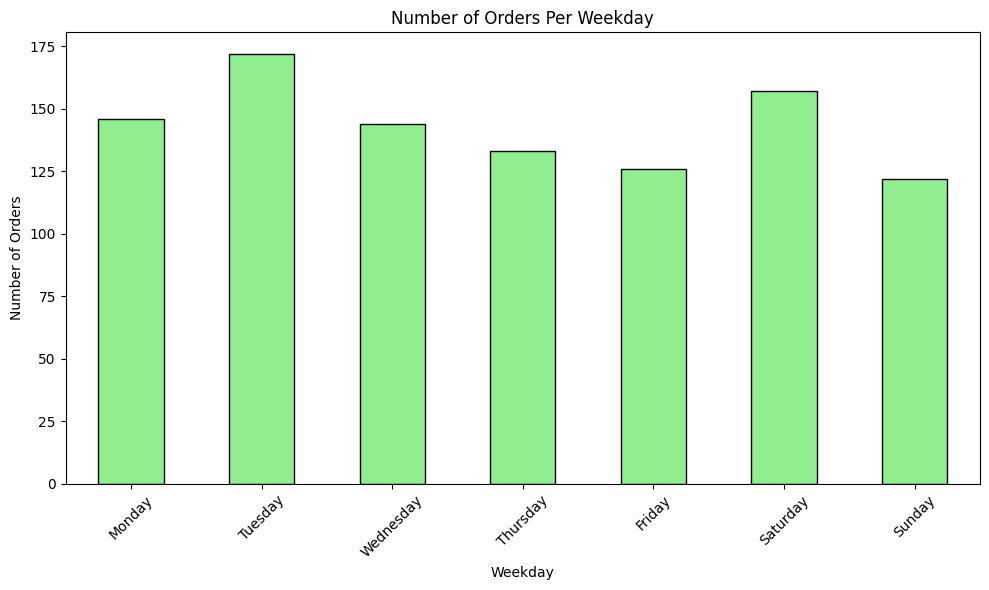

In [56]:
orders_per_weekday = orders_df_cleaned['Weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
orders_per_weekday.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Orders Per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

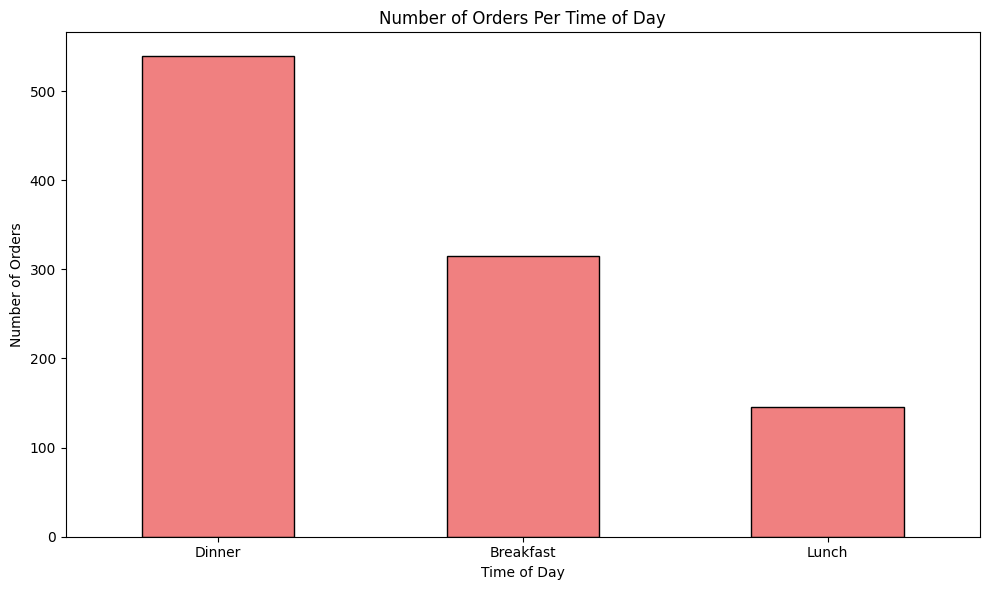

,count
Time of Day,
Dinner,539
Breakfast,315
Lunch,146


In [69]:
orders_per_time_of_day = orders_df_cleaned['Time of Day'].value_counts()

plt.figure(figsize=(10, 6))
orders_per_time_of_day.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Number of Orders Per Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
orders_per_time_of_day

### Payment Method Trends

In [28]:
orders_by_payment_method = orders_df_cleaned['Payment Method'].value_counts()
total_fees_by_payment_method = orders_df_cleaned.groupby('Payment Method')['Payment Processing Fee'].sum()

overall_highest_fee_method = total_fees_by_payment_method.idxmax()

highest_single_fee_order = orders_df_cleaned.loc[orders_df_cleaned['Payment Processing Fee'].idxmax()]
highest_single_fee_method = highest_single_fee_order['Payment Method']
highest_single_fee_value = highest_single_fee_order['Payment Processing Fee']

print("\nPayment Method Trends:")
print("Orders By Payment Method:")
print(orders_by_payment_method)
print("\nTotal Payment Processing Fees By Payment Method:")
print(total_fees_by_payment_method)
print(f"Payment Method with Highest Single Order Processing Fee: {highest_single_fee_method} (${highest_single_fee_value})")


Payment Method Trends:
Orders By Payment Method:
Payment Method
Cash on Delivery    357
Credit Card         337
Digital Wallet      306
Name: count, dtype: int64

Total Payment Processing Fees By Payment Method:
Payment Method
Cash on Delivery    10704
Credit Card         10072
Digital Wallet       9056
Name: Payment Processing Fee, dtype: int64
Payment Method with Highest Single Order Processing Fee: Cash on Delivery ($50)


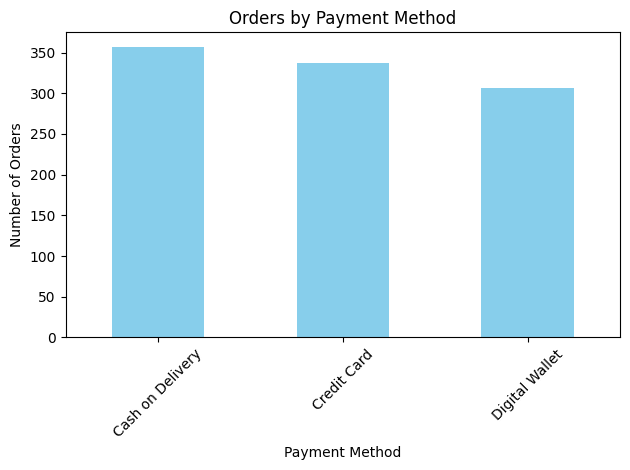

In [26]:
orders_by_payment_method.plot(kind='bar', color='skyblue', title='Orders by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Delivery Time Efficiency

In [14]:
orders_df_cleaned['Delivery Time (minutes)'].describe()

,Delivery Time (minutes)
count,1000.000000
mean,73.575000
std,26.015133
min,30.000000
25%,50.000000
50%,74.000000
75%,96.000000
max,119.000000


### Discount Trends

In [15]:
orders_df_cleaned['Discount Amount'].value_counts()

,count
Discount Amount,
50.00,202
0.00,185
46.50,3
88.90,3
17.10,3
...,...
69.45,1
58.50,1
9.75,1


In [18]:
discounted_orders = orders_df_cleaned[orders_df_cleaned['Discount Amount'] > 0]
non_discounted_orders = orders_df_cleaned[orders_df_cleaned['Discount Amount'] == 0]

order_volume_discounted = len(discounted_orders)
order_volume_non_discounted = len(non_discounted_orders)

print("Discount Impact:")
print(f"Order Volume (Discounted): {order_volume_discounted}")
print(f"Order Volume (Non-Discounted): {order_volume_non_discounted}")

Discount Impact:
Order Volume (Discounted): 815
Order Volume (Non-Discounted): 185


### Customer and Restaurant Insights

In [22]:
orders_per_customer = orders_df_cleaned['Customer ID'].value_counts()

orders_per_restaurant = orders_df_cleaned['Restaurant ID'].value_counts()

print("Customer Insights:")
print("Orders Per Customer:")
print(orders_per_customer)

print("\nRestaurant Insights:")
print("Orders Per Restaurant:")
orders_per_restaurant

Customer Insights:
Orders Per Customer:
Customer ID
C7938    3
C7949    3
C6486    2
C7190    2
C6977    2
        ..
C8509    1
C4854    1
C3491    1
C4124    1
C4335    1
Name: count, Length: 947, dtype: int64

Restaurant Insights:
Orders Per Restaurant:


,count
Restaurant ID,
R2317,6
R2804,5
R2726,5
R2523,5
R2016,5
...,...
R2141,1
R2428,1
R2576,1


### Profitability

In [29]:
total_orders = orders_df_cleaned.shape[0]
total_revenue = orders_df_cleaned['Revenue'].sum()
total_cost = orders_df_cleaned['Total Cost'].sum()
net_profit = orders_df_cleaned['Net Profit'].sum()

print(f"Total Orders: {total_orders}")
print(f"Total Revenue: {total_revenue}")
print(f"Total Costs: {total_cost}")
print(f"Total Profit: {net_profit}")

Total Orders: 1000
Total Revenue: 126990
Total Costs: 132741.85
Total Profit: -5751.85


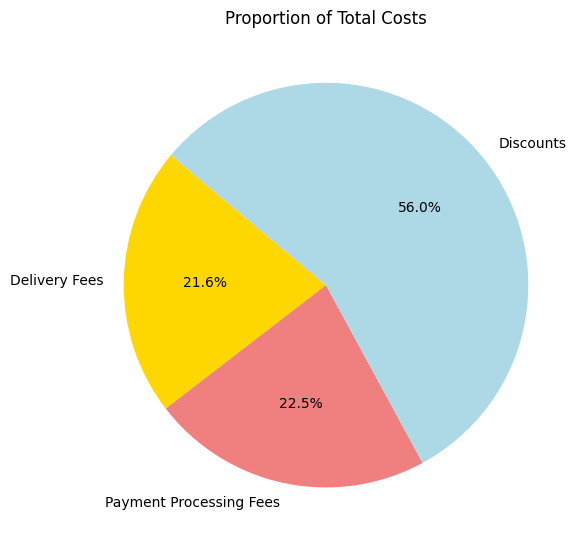

In [37]:
cost_count = orders_df_cleaned[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
labels = ['Delivery Fees', 'Payment Processing Fees', 'Discounts']

plt.figure(figsize=(6, 6))
plt.pie(cost_count, labels=labels,autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightblue'], startangle=140)
plt.title('Proportion of Total Costs')
plt.tight_layout()
plt.show()

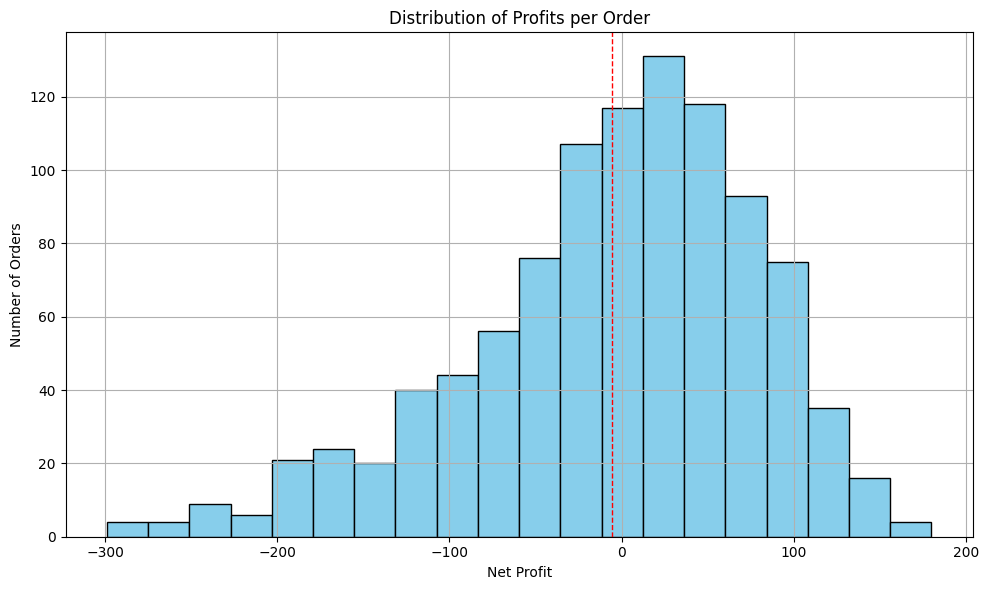

In [40]:
plt.figure(figsize=(10, 6))
orders_df_cleaned['Net Profit'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Profits per Order')
plt.xlabel('Net Profit')
plt.ylabel('Number of Orders')
plt.axvline(orders_df_cleaned['Net Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.show()

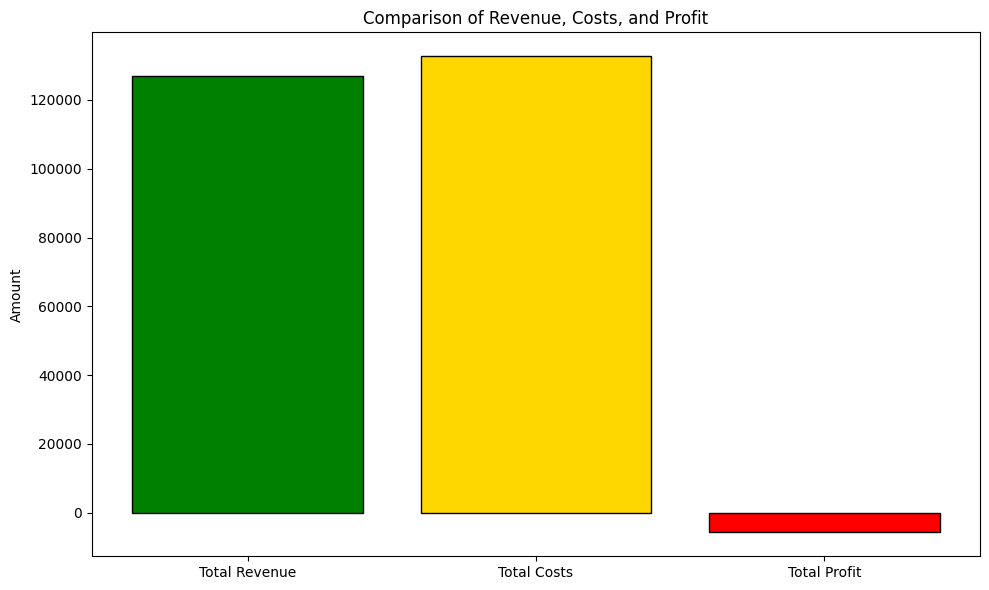

In [43]:
categories = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_cost, net_profit]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['green', 'gold', 'red'], edgecolor='black')
plt.title('Comparison of Revenue, Costs, and Profit')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

# Actionable Strategies

In [47]:
profitable_orders = orders_df_cleaned.loc[orders_df_cleaned['Net Profit'] > 0]
profitable_orders = profitable_orders.copy()

profitable_orders.loc[:, 'Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
average_commission_percentage = profitable_orders['Commission Percentage'].mean()

profitable_orders.loc[:, 'Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100
average_discount_percentage = profitable_orders['Discount Percentage'].mean()

print("Average Commission Percentage for Profitable Orders:", average_commission_percentage)
print("Average Discount Percentage for Profitable Orders:", average_discount_percentage)

Average Commission Percentage for Profitable Orders: 27.706528082159736
Average Discount Percentage for Profitable Orders: 5.623712042253798


# Impact Simulation of Proposed Strategies

In [48]:
recommended_discount_percentage = 6
recommended_commission_percentage = 30

orders_df_cleaned['Recommended Discount Amount'] = (recommended_discount_percentage / 100) * orders_df_cleaned['Order Value']

orders_df_cleaned['Recommended Commission Fee'] = (recommended_commission_percentage / 100) * orders_df_cleaned['Order Value']

orders_df_cleaned['Simulated Net Profit'] = orders_df_cleaned['Recommended Commission Fee'] - (orders_df_cleaned['Delivery Fee'] + orders_df_cleaned['Payment Processing Fee'] + orders_df_cleaned['Recommended Discount Amount'])

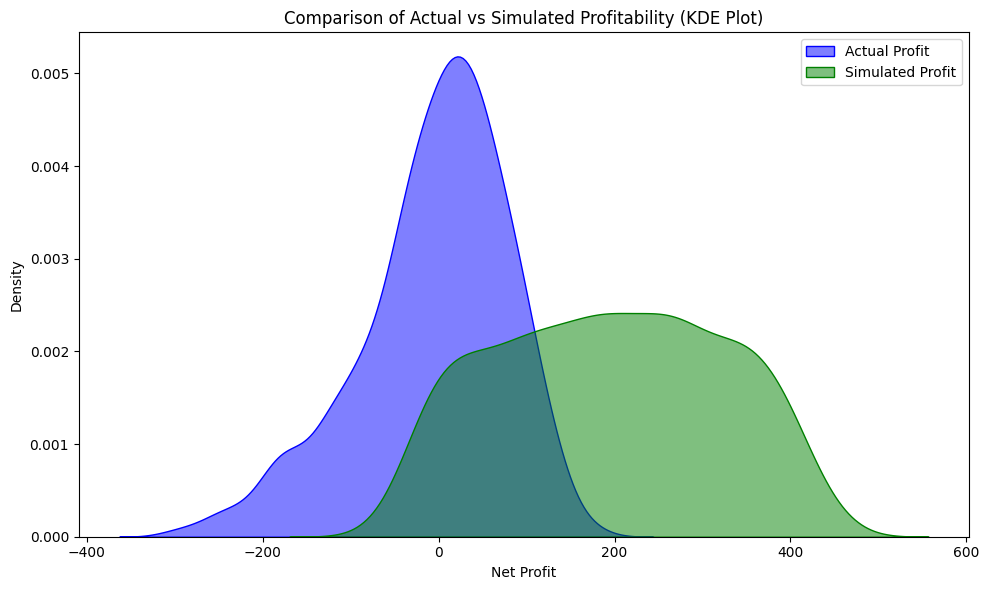

In [52]:
plt.figure(figsize=(10, 6))

# KDE plot for actual net profit
sns.kdeplot(orders_df_cleaned['Net Profit'], label='Actual Profit', color='blue', fill=True, alpha=0.5)

# KDE plot for simulated net profit
sns.kdeplot(orders_df_cleaned['Simulated Net Profit'], label='Simulated Profit', color='green', fill=True, alpha=0.5)

plt.title('Comparison of Actual vs Simulated Profitability (KDE Plot)')
plt.xlabel('Net Profit')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()